In [1]:
from __future__ import print_function                  # Allows for python3 printing
import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten,Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras import optimizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
images = pd.read_csv('hmnist_64_64_L.csv')
images = np.array(images) #dim = (4097,1)

(5000, 64, 64, 1)


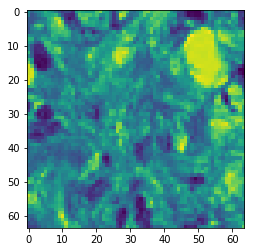

In [3]:
X = images[:,0:4096]
num_samples = len(X)
X = np.reshape(X, (num_samples,64,64,1))
print(X.shape)
y = images[:,4096]    #label: 8 class, index 1,2,...8
plt.imshow(X[0][:,:,0])

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

the shape of training data is: (4000, 64, 64, 1) (4000,)
the shape of testing data is: (1000, 64, 64, 1) (1000,)
the range of feature is: 2 to 255
the range of label is: 1 to 8
label 1 is 4
label 2 is 3
label 3 is 5
label 4 is 1
label 5 is 4


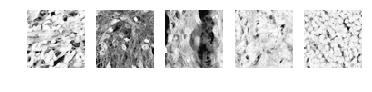

In [4]:
print ('the shape of training data is:',x_train.shape,y_train.shape)       #print data shape
print ('the shape of testing data is:',x_val.shape,y_val.shape)

import numpy as np
print ('the range of feature is:',np.min(x_train),'to',np.max(x_train))
print ('the range of label is:',np.min(y_train),'to',np.max(y_train))

import matplotlib.pyplot as plt
% matplotlib inline
for i in range(5):
    image = x_train[i][:,:,0]
    plt.subplot(1,5, i+1)

    print ('label', i+1, 'is',y_train[i])
    plt.imshow(image, cmap='Greys')
    plt.axis('off')
    


In [5]:
# convert class vectors to binary class matrices
x_train =x_train/255
x_val = x_val/255
y_train = keras.utils.to_categorical(y_train-1, num_classes=8)
y_val = keras.utils.to_categorical(y_val-1, num_classes=8)

In [6]:
def ConvNet(num_classes=8):

    images = Input(shape=(64, 64,1))           #use input shape that matches image size
    
    # Convolutional layers
    x = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(images)  #conv layer1
    x = Dropout(0.25)(x)                     #dropout layer1
    
    x = Conv2D(filters=64, kernel_size=(2, 2), activation='relu')(x)   #conv layer2
    x = MaxPooling2D(pool_size=(2, 2))(x)  #pooling layer2
    x = Dropout(0.5)(x)                     #dropout layer1

    # Fully-connected layer: 
    x = Flatten()(x)          
    x = Dense(128)(x)         #200 neurons fc layer
    x = Dense(units=num_classes, activation='softmax')(x)

    # Instantiate a model based on inputs/outputs
    model = Model(inputs=images, outputs=x)

    # Configure the model for training. 
    model.compile(
            loss='categorical_crossentropy',
            optimizer=optimizers.Adam(),
            metrics=[keras.metrics.categorical_accuracy])

    return model

In [7]:
model = ConvNet()
model.fit(
        x=x_train,
        y=y_train,
        epochs=15,
        validation_data=(x_val, y_val),
        shuffle=True)

Train on 4000 samples, validate on 1000 samples
Epoch 1/15
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7597 - categorical_accuracy: 0.4203 - val_loss: 1.0639 - val_categorical_accuracy: 0.5270
Epoch 2/15
4000/4000 [==============================] - 2s 499us/step - loss: 0.9106 - categorical_accuracy: 0.6352 - val_loss: 0.9444 - val_categorical_accuracy: 0.6020
Epoch 3/15
4000/4000 [==============================] - 2s 490us/step - loss: 0.7573 - categorical_accuracy: 0.7165 - val_loss: 0.9455 - val_categorical_accuracy: 0.5980
Epoch 4/15
4000/4000 [==============================] - 2s 511us/step - loss: 0.6221 - categorical_accuracy: 0.7685 - val_loss: 0.9784 - val_categorical_accuracy: 0.6150
Epoch 5/15
4000/4000 [==============================] - 2s 517us/step - loss: 0.4474 - categorical_accuracy: 0.8425 - val_loss: 1.0018 - val_categorical_accuracy: 0.6170
Epoch 6/15
4000/4000 [==============================] - 2s 522us/step - loss: 0.3504 - categorical_accur

In [8]:
train_score = model.evaluate(x_train, y_train)       # evaluate model on training dataset
test_score = model.evaluate(x_val, y_val)          # evaluate model on testing dataset

print ('\n')                                         # start from a new line      
print('Training accuracy:', train_score[1])          # print out training accuracy
print('Testing accuracy:', test_score[1])            # print out testing accuracy

1000/1000 [==============================] - 0s 134us/step


Training accuracy: 0.951
Testing accuracy: 0.63


In [9]:
model.save('Conv2D_2.h5')